In [ ]:
!pip install pymongo
!pip install requests
!pip install polars
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install h2o
!pip install pyarrow

In [1]:
import mondongo
import cleanfiles
import eda
import transforms
import dbSQL

In [ ]:
mondongo.upload_data()

In [ ]:
cleanfiles.clean_files()

In [2]:
df = eda.get_dataframe()

Conectando a MongoDB para extraer datos...
DataFrame creado con exito: 181691 filas y 136 columnas.


Analizando calidad del dato (Nulos y Vacios)...

Se han detectado 106 columnas con datos faltantes.
Top 100 variables con mas nulos/vacios:
 - gsubname3: 181671 faltantes (99.99%)
 - weapsubtype4: 181621 faltantes (99.96%)
 - weapsubtype4_txt: 181621 faltantes (99.96%)
 - weaptype4: 181618 faltantes (99.96%)
 - weaptype4_txt: 181618 faltantes (99.96%)
 - claimmode3: 181558 faltantes (99.93%)
 - claimmode3_txt: 181558 faltantes (99.93%)
 - gsubname2: 181531 faltantes (99.91%)
 - claim3: 181373 faltantes (99.82%)
 - guncertain3: 181371 faltantes (99.82%)
 - gname3: 181367 faltantes (99.82%)
 - divert: 181367 faltantes (99.82%)
 - attacktype3: 181263 faltantes (99.76%)
 - attacktype3_txt: 181263 faltantes (99.76%)
 - ransomnote: 181177 faltantes (99.72%)
 - ransompaidus: 181139 faltantes (99.70%)
 - ransomamtus: 181128 faltantes (99.69%)
 - claimmode2: 181075 faltantes (99.66%)
 - claimmode2_txt: 181075 faltantes (99.66%)
 - ransompaid: 180917 faltantes (99.57%)
 - corp3: 180665 faltantes

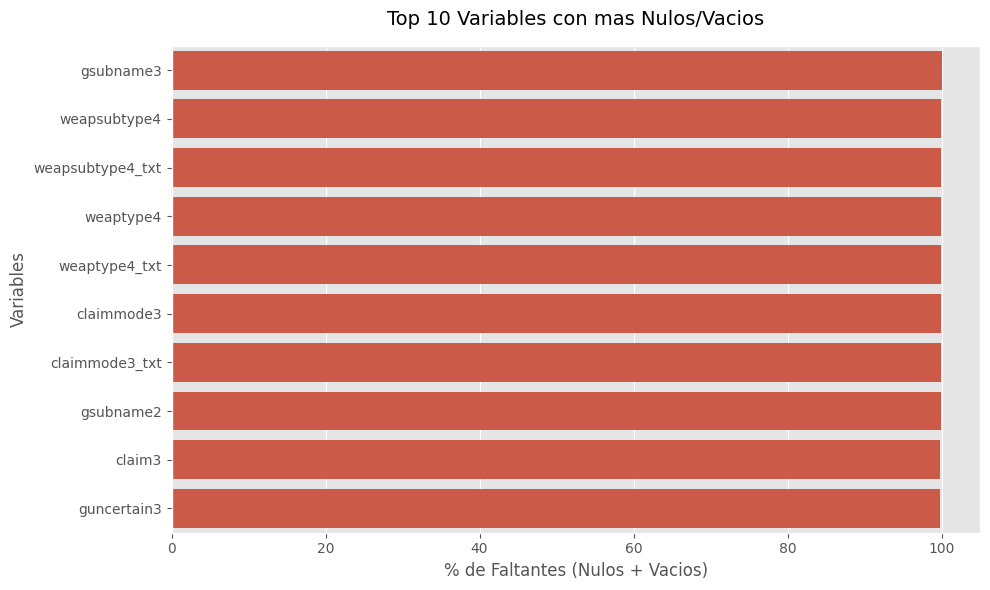

In [3]:
missing_col = eda.analyze_data_quality(df)

In [4]:
missing_col

['gsubname3',
 'weapsubtype4',
 'weapsubtype4_txt',
 'weaptype4',
 'weaptype4_txt',
 'claimmode3',
 'claimmode3_txt',
 'gsubname2',
 'claim3',
 'guncertain3',
 'gname3',
 'divert',
 'attacktype3',
 'attacktype3_txt',
 'ransomnote',
 'ransompaidus',
 'ransomamtus',
 'claimmode2',
 'claimmode2_txt',
 'ransompaid',
 'corp3',
 'targsubtype3',
 'targsubtype3_txt',
 'natlty3',
 'natlty3_txt',
 'target3',
 'targtype3',
 'targtype3_txt',
 'ransomamt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype3',
 'weaptype3_txt',
 'claim2',
 'guncertain2',
 'gname2',
 'resolution',
 'kidhijcountry',
 'nhours',
 'compclaim',
 'gsubname',
 'attacktype2',
 'attacktype2_txt',
 'ndays',
 'approxdate',
 'corp2',
 'nreleased',
 'targsubtype2',
 'targsubtype2_txt',
 'natlty2',
 'natlty2_txt',
 'hostkidoutcome',
 'hostkidoutcome_txt',
 'target2',
 'targtype2',
 'targtype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype2',
 'weaptype2_txt',
 'nhostkidus',
 'nhostkid',
 'claimmode',
 'claimmode_txt',
 'rela

Todas esas columnas tienen un dato vacío o algún nulo

In [5]:
eda.check_duplicates(df)

Analizando duplicados...
Analisis de duplicados en 'eventid': 0 encontrados.


0

No hay ningún valor duplicado

In [6]:
df.describe()

statistic,_id,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,…,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""count""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""",…,"""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691""","""181691"""
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",…,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""min""","""698b7d67c657c7e77609da0c""","""197000000001""","""1970""","""0""","""0""","""""","""0""","""""","""10""","""Afghanistan""","""1""","""Australasia & Oceania""","""""","""""","""""","""""","""""","""-9""","""""","""""","""0""","""0""","""0""","""""","""""","""""","""""","""0""","""0""","""1""","""Armed Assault""","""""","""""","""""","""""","""1""",…,"""""","""""","""""","""""","""""","""""","""-9""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""Anti-Abortion Project 2010""","""-9""","""-9""","""-9""","""-9""",""""""
"""25%

Analizando las columnas y su contenido vemos que realmente solo tenemos unas 35 columnas útiles

In [7]:
df_clean = eda.select_star_schema_variables(df)

Seleccionando variables para el modelo
Modelo de estrella filtrado: 22 columnas seleccionadas.


In [8]:
df_clean.schema

Schema([('nkill', String),
        ('nwound', String),
        ('success', String),
        ('propvalue', String),
        ('iyear', String),
        ('imonth', String),
        ('iday', String),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', String),
        ('longitude', String),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Aquí procederemos a modificar el tipo de variable de unas columnas específicas, para que en lugar de estar en string, sean números

In [9]:
df_clean = eda.cast_numeric_columns(df_clean)

Corrigiendo tipos de datos numéricos...
 - Columna 'nkill' convertida a Int64.
 - Columna 'nwound' convertida a Int64.
 - Columna 'propvalue' convertida a Int64.
 - Columna 'iyear' convertida a Int64.
 - Columna 'imonth' convertida a Int64.
 - Columna 'iday' convertida a Int64.
 - Columna 'success' convertida a Int64.
 - Columna 'latitude' convertida a Float64.
 - Columna 'longitude' convertida a Float64.


In [10]:
df_clean.schema

Schema([('nkill', Int64),
        ('nwound', Int64),
        ('success', Int64),
        ('propvalue', Int64),
        ('iyear', Int64),
        ('imonth', Int64),
        ('iday', Int64),
        ('country_txt', String),
        ('region_txt', String),
        ('provstate', String),
        ('city', String),
        ('latitude', Float64),
        ('longitude', Float64),
        ('gname', String),
        ('gsubname', String),
        ('attacktype1_txt', String),
        ('suicide', String),
        ('targtype1_txt', String),
        ('corp1', String),
        ('target1', String),
        ('weaptype1_txt', String),
        ('weapsubtype1_txt', String)])

Y ahora procederemos con el mapeo de las columnas categóricas.

In [11]:
eda.list_categorical_uniques(df_clean)

Buscando valores únicos en columnas de texto...

Columna String: 'country_txt'
  Total únicos: 205
  Valores (Top 15): ['Vietnam', 'Panama', 'Botswana', 'Vatican City', 'Estonia', 'Peru', 'West Germany (FRG)', 'South Africa', 'Syria', 'Maldives', 'Barbados', 'Cyprus', 'Democratic Republic of the Congo', 'Trinidad and Tobago', 'Cuba']...

Columna String: 'region_txt'
  Total únicos: 12
  Valores: ['Central America & Caribbean', 'Eastern Europe', 'East Asia', 'North America', 'Southeast Asia', 'Western Europe', 'Central Asia', 'South Asia', 'Sub-Saharan Africa', 'Middle East & North Africa', 'South America', 'Australasia & Oceania']

Columna String: 'provstate'
  Total únicos: 2855
  Valores (Top 15): ['Timbuktu', 'Milne Bay', 'Western Bieh', 'Chlef  (Province)', 'Kandal (Province)', 'Jamtland', 'Puducherry', 'St. Petersburg', 'Tearce (Municipality)', 'Krasnodarsky', 'Sungai Padi ( District )', 'Northern Red Sea', 'Primorsky Krai', 'Melilla', 'Kachin']...

Columna String: 'city'
  Total 

{'country_txt': ['Vietnam',
  'Panama',
  'Botswana',
  'Vatican City',
  'Estonia',
  'Peru',
  'West Germany (FRG)',
  'South Africa',
  'Syria',
  'Maldives',
  'Barbados',
  'Cyprus',
  'Democratic Republic of the Congo',
  'Trinidad and Tobago',
  'Cuba',
  'Bosnia-Herzegovina',
  'Uruguay',
  'Norway',
  'Morocco',
  'Jordan',
  'Libya',
  'Soviet Union',
  'Moldova',
  'Hungary',
  'Czech Republic',
  'Montenegro',
  'Yemen',
  'Uzbekistan',
  'Czechoslovakia',
  'Martinique',
  'Sri Lanka',
  'Dominica',
  'Gabon',
  'Serbia-Montenegro',
  'Azerbaijan',
  'Yugoslavia',
  'Senegal',
  'Falkland Islands',
  'Chile',
  'Macedonia',
  'Laos',
  'Dominican Republic',
  'Antigua and Barbuda',
  'Saudi Arabia',
  'Cameroon',
  'Kazakhstan',
  'Guinea-Bissau',
  'Turkey',
  'Brunei',
  'Israel',
  'India',
  'Djibouti',
  'Poland',
  'Wallis and Futuna',
  'Myanmar',
  'Singapore',
  'Croatia',
  'Ukraine',
  'Canada',
  'Solomon Islands',
  'New Zealand',
  'Italy',
  'Philippines',
 

Con esas columnas que sabemos que son tipo string, vamos a codificarlas a numérico conservando el mapeo.

In [ ]:
df_num, mis_mapeos = eda.encode_categorical_columns(df_clean)

Para poder trabajar con h2o, este solo acepta dataframes de pandas, por lo tanto creamos una funcion para convertir el dataframe de polars a pandas.

In [ ]:
df_pandas = transforms.convert_to_pandas(df_num)

In [ ]:
df_pandas

# DESDE AQUIIIIIIIIIIIII!!!!!!!!!!

In [ ]:
if "eventid" not in df_clean.columns:
    df_clean = df_clean.with_columns(df.select("eventid"))

Recuperando eventid...


In [16]:
dbSQL.ejecutar_pipeline_sql(df_clean)


Iniciando SQL Pipeline en: data/terrorismo_gtd.db
Directorio creado: data
Base de datos limpia.
Procesando dimensión: id_tiempo...
Procesando dimensión: id_ubicacion...
Procesando dimensión: id_grupo...
Procesando dimensión: id_metodo...
Procesando dimensión: id_objetivo...
Procesando Armas y Puente...
Hechos insertados: 181691
ETL SQL Finalizado.


In [18]:
df_sql = dbSQL.extraer_dataframe_analitico()


Extrayendo datos de: data/terrorismo_gtd.db...
Extracción completada: 181691 filas recuperadas.
